Credit Risk Assessment project using Python. We will be using the German Credit Dataset which is available on Kaggle.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

In [8]:
df = pd.read_csv('german_credit_data.csv')

In [9]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
# Shape of the data
print('Shape of the dataset:', df.shape)

Shape of the dataset: (1000, 10)


In [7]:
# Checking for missing values 
print('Missing values:\n', df.isna().sum())

Missing values:
 Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [21]:
# Show the values in risk
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [59]:
# Convert into numerical
df['Risk'] = df['Risk'].map({'good': 0, 'bad': 1})

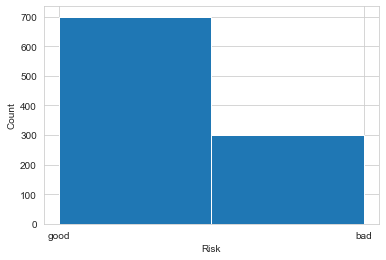

In [17]:
# Check the distribution of the target variable 
sns.set_style('whitegrid')
plt.hist(df['Risk'], bins=2)
plt.xlabel('Risk')
plt.ylabel('Count')
plt.show()

In [23]:
# Remove useless columns 
df.drop(['Saving accounts','Checking account'], axis=1, inplace=True)

In [26]:
#Encoding categorical variables 
df = pd.get_dummies(df, columns=['Sex', 'Housing', 'Purpose'], drop_first=True)

,Unnamed: 0,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,1169,6,good,1,1,0,0,0,0,0,1,0,0
1,1,22,2,5951,48,bad,0,1,0,0,0,0,0,1,0,0
2,2,49,1,2096,12,good,1,1,0,0,0,1,0,0,0,0
3,3,45,2,7882,42,good,1,0,0,0,0,0,1,0,0,0
4,4,53,2,4870,24,bad,1,0,0,1,0,0,0,0,0,0
5,5,35,1,9055,36,good,1,0,0,0,0,1,0,0,0,0
6,6,53,2,2835,24,good,1,1,0,0,0,0,1,0,0,0
7,7,35,3,6948,36,good,1,0,1,1,0,0,0,0,0,0
8,8,61,1,3059,12,good,1,1,0,0,0,0,0,1,0,0
9,9,28,3,5234,30,bad,1,1,0,1,0,0,0,0,0,0


# Model Training 

In [27]:
# Split the dataset into the testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Risk', axis=1), df['Risk'],test_size=0.33, random_state=42)

In [28]:
# Create a logistics model
lr = LogisticRegression()

# Fit the model
lr.fit(X_train, y_train)

C:\Users\bovel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# Making predictions on the testing data
y_pred = lr.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.6878787878787879


In [32]:
# Generating the classification report
print('Classification Report:', classification_report(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

         bad       0.47      0.14      0.21       101
        good       0.71      0.93      0.81       229

    accuracy                           0.69       330
   macro avg       0.59      0.53      0.51       330
weighted avg       0.64      0.69      0.62       330



In [49]:
# Generating the confusion matrix                          
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Confusion Matrix: [[ 14  87]
 [ 16 213]]


In [51]:
# make a variable for the Matrix
matrix = confusion_matrix(y_test, y_pred)

C:\Users\bovel\AppData\Local\Temp\ipykernel_7056\36818549.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


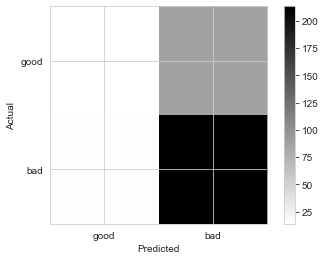

In [61]:
# Plot confusion matrix as an heatmap
plt.imshow(matrix,cmap='binary', interpolation='None')
plt.xticks([0, 1], ['good', 'bad'])
plt.yticks([0, 1], ['good', 'bad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show()

# Improving the model

In [41]:
from sklearn.model_selection import cross_val_score
def evaluate_model(model, X_train, y_train):
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

In [42]:
evaluate_model(lr, X_train, y_train)

C:\Users\bovel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bovel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [43]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
# Initialize the grid search object
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: {:.4f}".format(grid_search.best_score_))

C:\Users\bovel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bovel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters:  {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.6849


C:\Users\bovel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bovel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
T

In [82]:
# Create a new instance for the logistics model made for a better score 
model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')

# Fit the model into training data set
model.fit(X_train, y_train)

# There scores
Train_pred = model.predict(X_train)
Test_pred = model.predict(X_test)

train_score = accuracy_score(y_train, Train_pred)
test_score = accuracy_score(y_test, Test_pred)

print("Train score: {:.2f}%".format(train_score * 100))
print("Test score: {:.2f}%".format(test_score * 100))
print("\n")

print("Trained model:", model)

Train score: 72.69%
Test score: 69.39%


Trained model: LogisticRegression(C=0.1, solver='liblinear')


We can reuse our model for new data that comes in about another person. However we have to go through the data cleansing process again to reformat the data into the same format we had for our model. The process after that is simple. We set our new features for the data then use the predict() function and print() to print out our new predictions for our target column, being our risk column. 

Example: Imputting new dataset

In [ ]:
# Load the trained model from disk
import joblib
model = joblib.load('credit_risk_model.joblib')

# Load the new data into a Pandas DataFrame
import pandas as pd
new_data = pd.read_csv('new_data.csv')

# Prepare the new data using the same encoding, scaling and format as the training data
# ...

# Make predictions on the new data
X_new = new_data.drop(columns=['risk'])
y_pred = model.predict(X_new)

# Print the predicted risk values
print(y_pred)

Or if we have to just add one person:

In [86]:
# create a data point for the individual you want to assess
new_data_point = [[700, 0.5, 10000, 1, 0, 1, 0, 0, 0, 1,1,1,0,1,0]]

# use the trained model to make a prediction
prediction = model.predict(new_data_point)

# print the predicted credit risk assessment
print("The predicted credit risk assessment for this individual is:", prediction)

The predicted credit risk assessment for this individual is: ['good']


C:\Users\bovel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Conclusion

In this project, we used Python to build a credit risk assessment model using machine learning. 
We started by exploring and cleaning the data, then we engineered features and built a baseline logistic regression model. 
This model can be used to help lenders make informed decisions about whom to lend money to and at what interest rate.